In [638]:
import codecs
import os

with codecs.open('data/ba.txt', "rb",encoding="utf-8-sig") as file, codecs.open("baUpdated.txt", "wb", encoding="utf-8-sig") as output:     
    text = str()
    for line in file:
        if line.strip()[-1] == "।" or line.strip()[-1] == ".":
            #print(line)
            text = "{} {}".format(text, line).lstrip()
            text = text.lstrip()
        else:
            #print(line)
            text = "{} {}".format(text, line.strip()).lstrip()
        
    output.seek(0);
    output.write(text)
    #print(text)
    #print(lines)

# for line in lines:
#     print(line)

In [1]:
final = []

In [2]:
import re

file_dict = {'अ': 'a.txt', 'आ': 'aa.txt', 'इ':'i.txt', 'ई':'ii.txt', 'उ': 'u.txt', 'ऊ':'uu.txt', 'ए':'e.txt', 'ऐ':'ai.txt','ओ': 'o.txt','औ': 'au.txt', 'क': 'ka.txt', 'ख': 'kha.txt', 'ग': 'ga.txt', 'घ': 'gha.txt', 'ङ':'nga.txt', 'च': 'ca.txt', 'छ':'cha.txt', 'ज':'ja.txt', 'झ': 'jha.txt', 'ञ':'nja.txt', 'ट':'tta.txt', 'ठ':'ttha.txt', 'ड':'dda.txt','ढ':'ddha.txt', 'ण':'nna.txt', 'त':'ta.txt', 'थ':'tha.txt','द':'da.txt', 'ध': 'dha.txt', 'न':'na.txt', 'प':'pa.txt', 'फ':'pha.txt', 'ब':'ba.txt', 'भ':'bha.txt', 'म':'ma.txt', 'य':'ya.txt', 'र':'ra.txt', 'ल':'la.txt', 'व':'va.txt','श':'sha.txt', 'ष':'ssa.txt', 'स':'sa.txt','ह':'ha.txt'}

In [3]:
lines  = []
for key in file_dict:
    with open("data/"+file_dict[key],encoding="utf-8-sig") as file:     
        for line in file:
            if line[-1] != "।" or line[-1] != ".":
                lines.append(key+":"+line.strip())
    #print(lines)

In [4]:
import grapheme

In [5]:
gender_set = set(["पु","स्त्री"])
type_set = set(["स", "क्रि", "अ", "वि"])
ref_char = "दे"
#letter = "द"
all_f =  []
for line in lines:
    #print(line)
    letter = line[0]
    word_list = []
    word = re.split('―|–|—', line[2:], 1) #list(map(str.strip, line.split(['―', '-'],1))) #extract Word
    #print("Word:",word)
    if '/' in word[0]: #split words with /
        t = word[0].split("/")
        t = [x.strip() for x in t]
        filter(None, t)
        word_list.append(t[0])
        #print(list(grapheme.graphemes(tmp[1])))
        length = -len(list(grapheme.graphemes(t[1])))
        #print(length)
        base = list(grapheme.graphemes(t[0]))[:length]
        #print(base); print(len(tmp[1:]))
        for i in range(1,len(t[1:])+1):
            word_list.append(''.join(base)+t[i])
        #print(word_list)
    else:
        word_list.append(word[0].strip())
    loc = re.findall(r'\(([^\(\)]*)\)', word[1])
    if len(loc)!=0:
        loc = list(map(str.strip, loc[0].split(','))) #extract location
        #print("Location", loc)
        word[1] = re.sub('\([^)]*\)', '', word[1]) #remove location
    #print("Remaining:", word[1])
    val = list(map(str.strip, word[1].split("०")))
    gender, partOfSpeech, reference = "",[],"N"
    set_properties = set(val[:-1])
    if ref_char in val:
        reference = "F"
      
    type_intersection = list(set_properties.intersection(type_set))
    
    if set_properties & gender_set:
        gender = list(set_properties & gender_set)[0]
    
    if set_properties & type_set:
        partOfSpeech = list(set_properties & type_set)
    
    for i in range(len(word_list)):
        all_f.append([letter, word_list[i], gender, partOfSpeech, loc, reference, val[-1]]) 
        if letter == "र":
            print("Letter:", letter)
            print("Word:", word_list[i])
            #print("Gender:", gender)
            #print("Part of Speech:", partOfSpeech)
            #print("Location:", loc)
            #print("Reference:", reference)
            print("Meaning:", val[-1])
            #print("\n")

Letter: र
Word: रंक
Meaning: रंग।
Letter: र
Word: रंगजमाड़
Meaning: मकड़ी का जाल।
Letter: र
Word: रंगड़
Meaning: कठोर आदमी।
Letter: र
Word: रंगढंग
Meaning: चाल चलन, चाल-ढाल, तौर-तरीका।
Letter: र
Word: रंगणा
Meaning: रंग चढ़ाना, रंगना।
Letter: र
Word: रंगाट
Meaning: पशु का जोर-जोर से शब्द करने का भाव।
Letter: र
Word: रंगाड़
Meaning: वस्तुओं का बिखराव।
Letter: र
Word: रंगाड़ना
Meaning: कटी फसल को सुखाने के लिए फैलाना, बिखेरना।
Letter: र
Word: रंगाहडू
Meaning: मकड़ी।
Letter: र
Word: रंगीण
Meaning: रंगीन।
Letter: र
Word: रंगे
Meaning: बेशक।
Letter: र
Word: रंगोणा
Meaning: रंग जाना।
Letter: र
Word: रंघड़
Meaning: एक जाति विशेष।
Letter: र
Word: रंघडोल
Meaning: ततैया।
Letter: र
Word: रंघरुंघ
Meaning: गुप्त रूप से पता चलाने की क्रिया।
Letter: र
Word: रंच
Meaning: एक औज़ार।
Letter: र
Word: रंच
Meaning: ज़रा-सा, थोड़ा-सा, मामूली।
Letter: र
Word: रंचक
Meaning: ज़रा सा।
Letter: र
Word: रंज
Meaning: नाराज़ होने का भाव, दुःख।
Letter: र
Word: रंजड़
Meaning: झगड़ा।
Letter: र
Word: रंटू
Meaning: हट्टा-क

In [403]:
final

[['अ',
  'अ',
  '',
  [],
  [],
  'N',
  '‛हा’ के अर्थ में स्वीकृति बोधक शब्द। प्रायः उपसर्ग के रूप में भी प्रयुक्त होता है और उलटा, रहित, हीन या निषेध का भाव व्यक्त करता है―यथा ‛अजोग’ [अयोग्य], ‛अजाण’ [अनजान]।'],
 ['अ',
  'अं',
  '',
  ['अ'],
  [],
  'N',
  'हां, हां जी आदि अर्थ में स्वीकृति बोधक शब्द।'],
 ['अ',
  'अं',
  '',
  [],
  ['शि०', 'सि०'],
  'N',
  'मैं। वस्तुतः शीघ्रता में बोलते समय ‛हांऊ’ का संक्षिप्त रूप।'],
 ['अ',
  'अं',
  '',
  ['अ'],
  ['सि०', 'सो०'],
  'N',
  'और, अन्य; दो शब्द या वाक्यों को जोड़ने वाला शब्द।'],
 ['अ',
  'अंअं',
  '',
  ['अ'],
  ['कु०'],
  'N',
  '‛ऐसा नहीं’ अर्थ का द्योतक निषेधार्थक अव्यय शब्द।'],
 ['अ', 'अंईश', '', ['वि'], [], 'N', 'आंशिक, थोड़ा, कुछ।'],
 ['अ', 'अंउआ', '', ['वि'], ['शि०'], 'N', 'अधपका तरल पदार्थ, कच्चा।'],
 ['अ', 'अंऊं', '', [], ['शि०'], 'N', 'हांऊं।'],
 ['अ',
  'अंऊदा',
  'पु',
  [],
  ['बि०'],
  'N',
  'चूल्हे के दायें, बायें या पीछे के खोखले भाग जिन में से आग निकलती रहती है और चूल्हे का काम लिया जाता है।'],
 ['अ', 'अंएं', '', []

In [1]:
import pandas as pd

In [7]:
df = pd.DataFrame(all_f, columns=["Letter",'Word','Gender', 'Type', 'Location', 'Reference', 'Meaning'])

In [8]:
df#[df['Meaning']=='मुंडन संस्कार।']

,Letter,Word,Gender,Type,Location,Reference,Meaning
0,अ,अ,,[],[],N,‛हा’ के अर्थ में स्वीकृति बोधक शब्द। प्रायः उप...
1,अ,अं,,[अ],[],N,"हां, हां जी आदि अर्थ में स्वीकृति बोधक शब्द।"
2,अ,अं,,[],"[शि०, सि०]",N,मैं। वस्तुतः शीघ्रता में बोलते समय ‛हांऊ’ का स...
3,अ,अं,,[अ],"[सि०, सो०]",N,"और, अन्य; दो शब्द या वाक्यों को जोड़ने वाला शब्द।"
4,अ,अंअं,,[अ],[कु०],N,‛ऐसा नहीं’ अर्थ का द्योतक निषेधार्थक अव्यय शब्द।
...,...,...,...,...,...,...,...
43509,ह,हौले,,[अ],[शि ०],N,संबोधन सूचक शब्द।
43510,ह,हौसणा,,"[क्रि, अ]",[कु०],N,हंसना।
43511,ह,हौणो,,"[क्रि, अ]",[शि०],N,हंसना।
43512,ह,हौसिणा,,"[क्रि, अ]",[कु०],N,हंसा जाना ।


In [62]:
s='कोढ़'
s.encode("unicode_escape")

b'\\u0915\\u094b\\u095d'

In [63]:
s='ज़'
s.encode("unicode_escape")

b'\\u091c\\u093c'

In [3]:
import numpy as np

In [10]:
df[df["Reference"]=="F"]['Meaning'].str.split('\\.|।', 1)#.split('।|.', 1)

40       [अंगरास्सड़, ]
41       [अंगरास्सड़, ]
45           [अंगरखी, ]
46             [अंगण, ]
48       [अंगरास्सड़, ]
              ...      
43176        [हियाठी, ]
43188        [हिल्लण, ]
43307          [हुळी, ]
43364         [हेरणो, ]
43451          [हौरफ, ]
Name: Meaning, Length: 1237, dtype: object

In [11]:
df

,Letter,Word,Gender,Type,Location,Reference,Meaning
0,अ,अ,,[],[],N,‛हा’ के अर्थ में स्वीकृति बोधक शब्द। प्रायः उप...
1,अ,अं,,[अ],[],N,"हां, हां जी आदि अर्थ में स्वीकृति बोधक शब्द।"
2,अ,अं,,[],"[शि०, सि०]",N,मैं। वस्तुतः शीघ्रता में बोलते समय ‛हांऊ’ का स...
3,अ,अं,,[अ],"[सि०, सो०]",N,"और, अन्य; दो शब्द या वाक्यों को जोड़ने वाला शब्द।"
4,अ,अंअं,,[अ],[कु०],N,‛ऐसा नहीं’ अर्थ का द्योतक निषेधार्थक अव्यय शब्द।
...,...,...,...,...,...,...,...
43509,ह,हौले,,[अ],[शि ०],N,संबोधन सूचक शब्द।
43510,ह,हौसणा,,"[क्रि, अ]",[कु०],N,हंसना।
43511,ह,हौणो,,"[क्रि, अ]",[शि०],N,हंसना।
43512,ह,हौसिणा,,"[क्रि, अ]",[कु०],N,हंसा जाना ।


In [12]:
#df['Meaning'] = split word with reference into reference word and other meaning
tmp = df[df["Reference"]=="N"]
df["Meaning"] = df[df["Reference"]=="F"]['Meaning'].str.split('।|\\.|,', 1)
df = (df.explode('Meaning').groupby(level=0)
       .apply(lambda x: x.assign(Reference=[x['Reference'].iloc[0]]+['N']*(len(x)-1)))  # keep first row of Col2 and replace rest with N
       .reset_index(drop=True)
      .dropna(subset=["Meaning"]))
df["Meaning"] = df["Meaning"].apply(lambda x:np.nan if x=="" else x)
df.dropna(subset=["Meaning"],inplace=True)

In [13]:
df#[tmp['Meaning']=='मुंडन संस्कार।']

,Letter,Word,Gender,Type,Location,Reference,Meaning
40,अ,अंगरेयास्सड़,पु,[],[कां०],F,अंगरास्सड़
42,अ,अंगरौड़,पु,[],[बि०],F,अंगरास्सड़
47,अ,अंगा,स्त्री,[],[कां०],F,अंगरखी
49,अ,अंगा,पु,[],"[मं०, कां०]",F,अंगण
52,अ,अंगाखड़,पु,[],[कां०],F,अंगरास्सड़
...,...,...,...,...,...,...,...
44408,ह,हियाण,पु,[],[च],F,हियाठी
44421,ह,हिलण,पु,[],[कु०],F,हिल्लण
44541,ह,हुलाई,स्त्री,[],[सि०],F,हुळी
44599,ह,हेरना,,"[स, क्रि]",[सो०],F,हेरणो


In [14]:
df["Letter"].unique()

array(['अ', 'आ', 'इ', 'ई', 'उ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ',
       'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'त', 'थ', 'द', 'ध', 'न',
       'प', 'फ', 'ब', 'भ', 'म', 'र', 'ल', 'व', 'श', 'स', 'ह'],
      dtype=object)

In [15]:
#df = df[~df.index.duplicated(keep='first')]
df = pd.concat([tmp, df])
df.reset_index(drop=True, inplace=True)
df.sort_index(inplace=True)
#del tmp

In [16]:
df[df['Meaning']=='इलकण']

,Letter,Word,Gender,Type,Location,Reference,Meaning
42360,इ,इलण,,[],[],F,इलकण
42363,ई,ईलक,स्त्री,[],[कु०],F,इलकण


In [17]:
df["Meaning"] = df["Meaning"].apply(lambda x:str(x).replace("।", ""))

In [18]:
df["Word"]=df["Word"].apply(lambda x:x.replace(u"\u0921\u093c", u"\u095c"))#.encode("utf-8-sig"))
df["Meaning"]=df["Meaning"].apply(lambda x:x.replace(u"\u0921\u093c", u"\u095c"))#.encode("utf-8-sig"))
df["Word"]=df["Word"].apply(lambda x:x.replace(u"\u0922\u093c", u"\u095d"))#.encode("utf-8-sig"))
df["Meaning"]=df["Meaning"].apply(lambda x:x.replace(u"\u0922\u093c", u"\u095d"))#.encode("utf-8-sig"))
df["Word"]=df["Word"].apply(lambda x:x.replace(":", u"\u0903"))#.encode("utf-8-sig"))
df["Meaning"]=df["Meaning"].apply(lambda x:x.replace(":", u"\u0903"))#.encode("utf-8-sig"))
df["Word"]=df["Word"].apply(lambda x:x.replace("\u091c\u093c", u"\u095b"))#.encode("utf-8-sig"))
df["Meaning"]=df["Meaning"].apply(lambda x:x.replace("\u091c\u093c", u"\u095b"))#.encode("utf-8-sig"))

In [19]:
df[df['Meaning']=='इलकण']

,Letter,Word,Gender,Type,Location,Reference,Meaning
42360,इ,इलण,,[],[],F,इलकण
42363,ई,ईलक,स्त्री,[],[कु०],F,इलकण


In [20]:
#df[df["Word"].duplicated()]
grouped = df[df["Reference"]=="N"].groupby('Word', as_index=False).agg({'Letter':'first',
                                    'Word':'first',
                                   'Gender': lambda x: list(x),
                                   'Type': lambda x: list(x),
                                   'Location': lambda x: list(x),
                                   'Reference': '; '.join,
                                   'Meaning':'; '.join})#.drop("Word", inplace=True, axis=1)#.reset_index(drop=True)
grouped = grouped.set_index('Word')

In [21]:
#grouped
#grouped[grouped.index == 'इलकण']
grouped.loc['इलकण',"Meaning"]

'गिद्ध'

In [22]:
tmp

,Letter,Word,Gender,Type,Location,Reference,Meaning
0,अ,अ,,[],[],N,‛हा’ के अर्थ में स्वीकृति बोधक शब्द। प्रायः उप...
1,अ,अं,,[अ],[],N,"हां, हां जी आदि अर्थ में स्वीकृति बोधक शब्द।"
2,अ,अं,,[],"[शि०, सि०]",N,मैं। वस्तुतः शीघ्रता में बोलते समय ‛हांऊ’ का स...
3,अ,अं,,[अ],"[सि०, सो०]",N,"और, अन्य; दो शब्द या वाक्यों को जोड़ने वाला शब्द।"
4,अ,अंअं,,[अ],[कु०],N,‛ऐसा नहीं’ अर्थ का द्योतक निषेधार्थक अव्यय शब्द।
...,...,...,...,...,...,...,...
43509,ह,हौले,,[अ],[शि ०],N,संबोधन सूचक शब्द।
43510,ह,हौसणा,,"[क्रि, अ]",[कु०],N,हंसना।
43511,ह,हौणो,,"[क्रि, अ]",[शि०],N,हंसना।
43512,ह,हौसिणा,,"[क्रि, अ]",[कु०],N,हंसा जाना ।


In [23]:
del tmp
tmp = df[df['Reference'] == "F"]
tmp.reset_index(drop = True, inplace=True)
#grouped.reset_index(inplace=True)

In [24]:
tmp.loc[:, "Meaning"] = grouped.loc[tmp["Meaning"].str.strip(),"Meaning"].reset_index(drop=True)

C:\Users\Nikhil\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [25]:
tmp[tmp['Meaning']=='\'इलकण\'']

,Letter,Word,Gender,Type,Location,Reference,Meaning


In [26]:
grouped.reset_index(inplace=True)

In [27]:
grouped.columns#["Word"].dtype

Index(['Word', 'Letter', 'Gender', 'Type', 'Location', 'Reference', 'Meaning'], dtype='object')

In [27]:
#for correcting the file
for index, row in df[df['Reference'] == "F"].iterrows():
    try: 
        df.loc[df["Word"]==row["Word"], "Meaning"] = grouped.loc[row["Meaning"].strip(), "Meaning"]
    except e:
        print(e)

NameError: name 'e' is not defined

In [28]:
df = pd.concat([tmp, grouped])
df.reset_index(drop=True, inplace=True)
df.sort_index(inplace=True)

In [29]:
#df[df['Meaning'] == 'मुंडन संस्कार']
df[df['Word'] == 'छटी']

,Letter,Word,Gender,Type,Location,Reference,Meaning
12498,छ,छटी,"[, , पु, ]","[[], [], [], []]","[[], [कु०, कां०, ह०], [शि०], []]",N; N; N; N,मुंडन संस्कार; गुरु या चेले में देवता का परवेश...


In [ ]:
!pip install spello

In [ ]:
from spello.model import SpellCorrectionModel  
sp = SpellCorrectionModel(language='hi')  

In [ ]:
# sp.load(r'C:\Users\Nikhil\Downloads\hi_large.pkl\hi_large.pkl')

In [ ]:
sp.config.min_length_for_spellcorrection = 4 # default is 3
sp.config.max_length_for_spellcorrection = 12 # default is 15
#sp.save(model_save_dir=r'C:\Users\Nikhil\Downloads\hi_large.pkl\hi_large.pkl')

In [ ]:
x = sp.spell_correct("चिपकली")
x['spell_corrected_text']

In [ ]:
import numpy as np

In [ ]:
df#.isnull().unique()

In [ ]:
for index, row in df.iterrows():
    if pd.isnull(row["Reference"]):
        x = sp.spell_correct(df.loc[index,"Meaning"])['spell_corrected_text']
        df.loc[index, "Meaning_corrected"] = x
        print(x)

In [ ]:
print("dfhv"+str(df["Reference"][0])+"dfhv"+str(df["Reference"][0]))#.Meaning.dtype

In [ ]:
df["Meaning_corrected"] = df["Meaning_corrected"].apply(lambda x:str(x).replace("  ", ", "))

In [ ]:
#df["Meaning_corrected"] = df["Meaning_corrected"].apply(lambda x:str(x).replace("।", ""))
df["Meaning_corrected"] = df["Meaning_corrected"].apply(lambda x:str(x).replace("।", ""))

In [ ]:
for i in range(0,df.shape[0]-1,1):
    if df.loc[i, 'Meaning_corrected']!=df.loc[i, 'Meaning']:
        print("Word: "+str(df.loc[i, 'Meaning'])+"\nCorrected: "+str(df.loc[i, 'Meaning_corrected']))

In [26]:
df[df['Word'] == 'गिधिहारा']

,Letter,Word,Gender,Type,Location,Reference,Meaning
378,ग,गिधिहारा,पु,[],[कु०],F,"धूपदानी, देवपूजा में प्रयुक्त कलछी की शक्ल का ..."


In [ ]:
x = df[df["Word"].isin(df.loc[df['Reference'] == 'दे',"Meaning"])]["Meaning"]

In [ ]:
df[df["Word"]=="कंगण"]["Meaning"]

In [102]:
slic = df[df['Letter']=='ष'] #
slic.reset_index(drop=True, inplace=True)

In [103]:
slic

,Letter,Word,Gender,Type,Location,Reference,Meaning
0,ष,षतणा,"[, ]","[[क्रि, अ], [क्रि, अ]]","[[चं०], [चं०]]",N; N,फंसना; आग लगना
1,ष,षप्पड़,[पु],[[]],[[चं०]],N,"कठोर चट्टान, कठोर वस्तु"
2,ष,षुद्र,[],[[वि]],[[चं०]],N,शरारती जिसे यज्ञोपवीत पहनने का अधिकार हो
3,ष,षुनौरुं,[],[[वि]],[[चं०]],N,शून्य किया हुआ
4,ष,षुन्ना,[],[[वि]],[[च०]],N,"भूखा, लालची"


In [197]:
# from deep_translator import GoogleTranslator
# import time
# start = time.time()
# for i in range(0,df.shape[0],50):
#     if i+50<=df.shape[0]:
#         df.loc[i:i+50, 'Meaning_en'] = df['Meaning'].iloc[i:i+50].apply(lambda x: GoogleTranslator(source='hindi', target='english').translate(x))
#         print("Number of words done:"+str(i+50))
#         end = time.time()
#         print(end - start)
#         time.sleep(20)
#     else:
#         df.loc[i:df.shape[0], 'Meaning_en'] = df['Meaning'].iloc[i:df.shape[0]].apply(lambda x: GoogleTranslator(source='hindi', target='english').translate(x))
#         print("Number of words done:"+str(df.shape[0]))
#         end = time.time()
#         print(end - start)

Number of words done:50
39.73081159591675
Number of words done:100
98.71706676483154
Number of words done:150
162.61334776878357
Number of words done:200
222.01913690567017
Number of words done:250
281.37868547439575
Number of words done:300
340.99811697006226
Number of words done:350
406.0241148471832
Number of words done:400
468.3974549770355
Number of words done:450
529.0858268737793
Number of words done:500
587.4028639793396
Number of words done:550
641.7631676197052
Number of words done:600
699.9625918865204
Number of words done:650
760.1380593776703
Number of words done:700
826.0547015666962
Number of words done:750
889.9399564266205
Number of words done:800
951.1249949932098
Number of words done:850
1016.9966497421265
Number of words done:900
1081.118712425232
Number of words done:950
1142.6431286334991
Number of words done:1000
1202.3177003860474
Number of words done:1050
1260.5773401260376
Number of words done:1100
1319.34499168396
Number of words done:1150
1388.4329555034637


In [104]:
#for gha, cha, jha, da, na, bha, ma, ha, aa, uu, e, au, i, ai, ttha, dda, tha, pha, la, nga, nja, nna, va, ssa
from deep_translator import GoogleTranslator
import time
start = time.time()
for i in range(0,slic.shape[0],50):
    if i+50<=slic.shape[0]:
        slic.loc[i:i+50, 'Meaning_en'] = slic['Meaning'].iloc[i:i+50].apply(lambda x: GoogleTranslator(source='hindi', target='english').translate(x))
        print("Number of words done:"+str(i+50))
        end = time.time()
        print(end - start)
        time.sleep(30)
    else:
        slic.loc[i:slic.shape[0], 'Meaning_en'] = slic['Meaning'].iloc[i:slic.shape[0]].apply(lambda x: GoogleTranslator(source='hindi', target='english').translate(x))
        print("Number of words done:"+str(slic.shape[0]))
        end = time.time()
        print(end - start)

Number of words done:5
5.794522285461426


C:\Users\Nikhil\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Nikhil\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [105]:
slic.to_csv('ssa.csv', encoding='utf-8-sig')

In [2]:
csv_dict = {'आ': 'aa.csv', 'इ':'i.csv', 'ई':'ii.csv', 'उ': 'u.csv', 'ऊ':'uu.csv', 'ए':'e.csv', 'ऐ':'ai.csv','ओ': 'o.csv','औ': 'au.csv', 'क': 'ka.csv', 'ख': 'kha.csv', 'ग': 'ga.csv', 'घ': 'gha.csv', 'ङ':'nga.csv', 'च': 'ca.csv', 'छ':'cha.csv', 'ज':'ja.csv', 'झ': 'jha.csv', 'ञ':'nja.csv', 'ट':'tta.csv', 'ठ':'ttha.csv', 'ड':'dda.csv','ढ':'ddha.csv', 'ण':'nna.csv', 'त':'ta.csv', 'थ':'tha.csv','द':'da.csv', 'ध': 'dha.csv', 'न':'na.csv', 'प':'pa.csv', 'फ':'pha.csv', 'ब':'ba.csv', 'भ':'bha.csv', 'म':'ma.csv', 'य':'ya.csv', 'र':'ra.csv', 'ल':'la.csv', 'व':'va.csv','श':'sha.csv', 'ष':'ssa.csv', 'स':'sa.csv','ह':'ha.csv'}

In [3]:
df = pd.read_csv('a.csv', encoding='utf-8-sig')
for key in csv_dict:
    t = pd.read_csv(csv_dict[key], encoding='utf-8-sig')
    df = pd.concat([df,t])
    del t

df.drop("Unnamed: 0", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df

,Letter,Word,Gender,Type,Location,Reference,Meaning,Meaning_en
0,अ,अंगरेयास्सड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
1,अ,अंगरौड़,पु,[],['बि०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
2,अ,अंगा,स्त्री,[],['कां०'],F,चोली,Bra
3,अ,अंगा,पु,[],"['मं०', 'कां०']",F,आंगन,Courtyard
4,अ,अंगाखड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
...,...,...,...,...,...,...,...,...
38319,ह,हड़ाटौ,['पु'],[[]],[['कु०']],N,दरवाजा बंद करने की अर्गला,door lock
38320,ह,हड़ाशणा,[''],"[['क्रि', 'स']]",[['सो०']],N,"झुलसाना, भूनना","scorch, roast"
38321,ह,हड़ाशो,['स्त्री'],[[]],[['सो०']],N,आग की तेज लपटें,bright flames of fire
38322,ह,हड़ी,['स्त्री'],[[]],[['चं०']],N,भैंस,Buffalo


In [5]:
import gensim.downloader as api
# overview of all models in gensim: https://github.com/RaRe-Technologies/gensim-data
model_glove = api.load("glove-wiki-gigaword-100")

In [6]:
import string
import numpy as np

In [7]:
df

,Letter,Word,Gender,Type,Location,Reference,Meaning,Meaning_en
0,अ,अंगरेयास्सड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
1,अ,अंगरौड़,पु,[],['बि०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
2,अ,अंगा,स्त्री,[],['कां०'],F,चोली,Bra
3,अ,अंगा,पु,[],"['मं०', 'कां०']",F,आंगन,Courtyard
4,अ,अंगाखड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे","embers, coals, glowing embers"
...,...,...,...,...,...,...,...,...
38319,ह,हड़ाटौ,['पु'],[[]],[['कु०']],N,दरवाजा बंद करने की अर्गला,door lock
38320,ह,हड़ाशणा,[''],"[['क्रि', 'स']]",[['सो०']],N,"झुलसाना, भूनना","scorch, roast"
38321,ह,हड़ाशो,['स्त्री'],[[]],[['सो०']],N,आग की तेज लपटें,bright flames of fire
38322,ह,हड़ी,['स्त्री'],[[]],[['चं०']],N,भैंस,Buffalo


In [8]:
from gensim.parsing.preprocessing import remove_stopwords

In [9]:
df['Vector'] = pd.Series([np.full((100),np.nan) for _ in range(len(df))],dtype='object')
# type missing meanings, ashakt translated a null picked up as null by pandas, changed to weak
for index, row in df.iterrows():
    #print(row['Word'])
    dict_vector = {}
    row['Meaning_en'] = row['Meaning_en'].translate(str.maketrans('', '', string.punctuation)) #remove punctuations
    if len(row["Meaning_en"].split())==1:
        try:
            vector = model_glove.get_vector(row['Meaning_en'].lower(), norm=True)
            #dict_vector[row["Meaning_en"]] = vector              
            print("Vectorized:", row["Word"])
            df.loc[index, "Vector"] = vector
        #print(df.loc[ind, "Vector"])
        except Exception as e:
            vector = [] 
            #print(row['Word'])
            #print(e)         #print(vector)

    else:  #remove stopwords, take average of words
        filtered_list = remove_stopwords(row['Meaning_en'].lower()).split()
        filtered_vectors = np.empty((100,), float) #np.array([[]])
        for word in filtered_list:
            try:
                vector = model_glove.get_vector(word.lower(), norm=True)
                filtered_vectors = np.vstack((filtered_vectors, vector))
                #print(vector.shape)
                
            except:
                vector = np.full(shape=100, fill_value=np.nan) #np.array([lambda x: np.full((100),np.nan)],dtype="float64") 
                filtered_vectors = np.vstack((filtered_vectors, vector)) #np.concatenate((filtered_vectors, vector))#filtered_vectors.append(vector)    
                #print(vector.dtype)
        #map(model_glove.get_vector(word.lower(), norm=True),filtered_list)#filtered_vector = filtered_list.apply(lambda x: 
        filtered_vectors = filtered_vectors[1:]
        #print(filtered_vectors)
        #print("bleh")
        vector = np.nanmean(filtered_vectors, axis=0)
        #print(vector.shape)
        #print(df.loc[index, "Vector"].shape)
        df.loc[index, "Vector"] = vector
        print("Vectorized:", row["Word"])

Vectorized: अंगरेयास्सड़
Vectorized: अंगरौड़
Vectorized: अंगा
Vectorized: अंगा
Vectorized: अंगाखड़
Vectorized: अंजन
Vectorized: अंजा
Vectorized: अंज्वाड़
Vectorized: अंटी
Vectorized: अंडा
Vectorized: अंदराळा
Vectorized: अंदरीह्ण
Vectorized: अंदरेळ
Vectorized: अंदरेळणा
Vectorized: अंदरेस
Vectorized: अंदरोठ
Vectorized: अंदरोण
Vectorized: अंद्रीणा
Vectorized: अंबकदाड़नी
Vectorized: अंबदाड़नी
Vectorized: अकडू
Vectorized: अकड़ैल
Vectorized: अकपाळिया
Vectorized: अक्करी
Vectorized: अखटी
Vectorized: अगरोळा
Vectorized: अग्नबाण
Vectorized: अजका
Vectorized: अजोका
Vectorized: अझें
Vectorized: अटकण
Vectorized: अटकावणो
Vectorized: अठमी
Vectorized: अठुआंस्सा
Vectorized: अठोछटी
Vectorized: अड़तीस
Vectorized: अणिदा
Vectorized: अणिद्रा
Vectorized: अदमुआ
Vectorized: अदेहा
Vectorized: अद्धा
Vectorized: अधसीस्सी
Vectorized: अधेऊ
Vectorized: अबसर
Vectorized: अबेल
Vectorized: अमलोड़ी
Vectorized: अयरन
Vectorized: अरढ़ौणा
Vectorized: अश्शु
Vectorized: अहां
Vectorized: अह्लणा
Vectorized: अह्ळी
Vectorized: अ
Vectorized: अ

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_9548\2988425665.py:36: RuntimeWarning: Mean of empty slice
  vector = np.nanmean(filtered_vectors, axis=0)


Vectorized: आरन
Vectorized: आरशू
Vectorized: आरसी
Vectorized: आरहा
Vectorized: आरा
Vectorized: आरिये
Vectorized: आरी
Vectorized: आरू
Vectorized: आर्क
Vectorized: आर्कणा
Vectorized: आर्न
Vectorized: आल
Vectorized: आलख
Vectorized: आलटू
Vectorized: आलबताल
Vectorized: आलर
Vectorized: आला
Vectorized: आला चांब
Vectorized: आलागर्द
Vectorized: आली
Vectorized: आलुआ
Vectorized: आलेरना
Vectorized: आलो
Vectorized: आल्हसी
Vectorized: आल्हा
Vectorized: आलड़ो
Vectorized: आळ
Vectorized: आळकोस
Vectorized: आळपटी
Vectorized: आळा
Vectorized: आळा-दोआळा
Vectorized: आळू
Vectorized: आळो
Vectorized: आवजी
Vectorized: आवबैठ
Vectorized: आवभगत
Vectorized: आवलू
Vectorized: आवा
Vectorized: आवोंटी
Vectorized: आवोल
Vectorized: आश
Vectorized: आशकरा
Vectorized: आशण
Vectorized: आशरा
Vectorized: आशू
Vectorized: आश्का
Vectorized: आस
Vectorized: आसण
Vectorized: आसतौ
Vectorized: आसरी
Vectorized: आसा
Vectorized: आस्ते
Vectorized: आस्‌
Vectorized: आहिदू
Vectorized: आहो
Vectorized: आहोत
Vectorized: आहोती
Vectorized: आहड़
Vectoriz

In [30]:
df#[df["Vector"]]
#df[df["Word"]=="कुकू"]
#df[df.index>=23021]

,Letter,Word,Gender,Type,Location,Reference,Meaning,Meaning_en,Vector
0,अ,अंगरेयास्सड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे",embers coals glowing embers,"[-0.1203679721802473, 0.06846641842275858, 0.0..."
1,अ,अंगरौड़,पु,[],['बि०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे",embers coals glowing embers,"[-0.1203679721802473, 0.06846641842275858, 0.0..."
2,अ,अंगा,स्त्री,[],['कां०'],F,चोली,Bra,"[-0.015152575, 0.02908954, -0.041924965, -0.10..."
3,अ,अंगा,पु,[],"['मं०', 'कां०']",F,आंगन,Courtyard,"[-0.04410359, 0.075957395, -0.024624985, 0.126..."
4,अ,अंगाखड़,पु,[],['कां०'],F,"अंगार, अंगारों का समूह, धधकते अंगारे",embers coals glowing embers,"[-0.1203679721802473, 0.06846641842275858, 0.0..."
...,...,...,...,...,...,...,...,...,...
38319,ह,हड़ाटौ,['पु'],[[]],[['कु०']],N,दरवाजा बंद करने की अर्गला,door lock,"[0.01451430725865066, 0.0034218477085232735, 0..."
38320,ह,हड़ाशणा,[''],"[['क्रि', 'स']]",[['सो०']],N,"झुलसाना, भूनना",scorch roast,"[-0.14673049375414848, 0.09129584208130836, -0..."
38321,ह,हड़ाशो,['स्त्री'],[[]],[['सो०']],N,आग की तेज लपटें,bright flames of fire,"[-0.022629489190876484, 0.020719679072499275, ..."
38322,ह,हड़ी,['स्त्री'],[[]],[['चं०']],N,भैंस,Buffalo,"[-0.014543199, 0.0005761744, 0.1088037, -0.176..."


In [34]:
df['Vector'].apply(lambda x: np.isnan(x).all())

0        False
1        False
2        False
3        False
4        False
         ...  
38319    False
38320    False
38321    False
38322    False
38323    False
Name: Vector, Length: 38324, dtype: bool

In [56]:
from scipy.stats import norm

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df["Vector"][1]

In [24]:
for i in range(0,20):
    df[df.loc[i, "Word"]] = 0.0
    A = np.array(df.loc[i, "Vector"])
    for j in range(0,20):
        B = np.array(df.loc[j, "Vector"])
        df.loc[j,df.loc[i,"Word"]] = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
        #print("With Word:", df.loc[j,"Word"])
        #print("Cosine Similarity:", df.loc[j,df.loc[i,"Word"]])

In [ ]:
norm(A)

In [37]:
df = df.iloc[:, :8]

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.linalg import DenseVector

def calculate_cosine_similarity(df):
    """Calculates cosine similarity between vectors in the 'Vector' column of a DataFrame.
    
    Args:
        df: DataFrame with a 'Vector' column containing NumPy arrays.
        
    Returns:
        DataFrame with added cosine similarity columns.
    """

    df['Vector'] = df['Vector'].apply(lambda x: np.array(x.toArray()) if isinstance(x, DenseVector) else x)
    df['Vector'] = df['Vector'].apply(lambda x: np.zeros(100) if (not isinstance(x, np.ndarray)) or (isinstance(x, np.ndarray) and np.isnan(x).all()) else x)
    
    vectors = np.array(df['Vector'].tolist())
    
    # Handle NaN values
    vectors[np.isnan(vectors)] = 0

    similarity_matrix = cosine_similarity(vectors)
    
    similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df["Word"])
    
    # Concatenate with the original DataFrame
    df = pd.concat([df, similarity_df], axis=1)

    return df, similarity_df

# Example usage:
df, similarity_matrix = calculate_cosine_similarity(df)
#print(df.head())

MemoryError: Unable to allocate 10.9 GiB for an array with shape (38324, 38324) and data type float64

In [22]:
df

,Word,Gender,Type,Location,Reference,Meaning,Meaning_en,Vector,कंगणा,ककड़े,...,कड़ोह्लू,कड़ौंची,कड़ौण,कड़ौळा,कढ़ना,कढ़यामणू,कढ़ाला,कढ़ी,कढ़ेलू,कढ़ोल
0,कंगणा,पु,[],[],F,हाथ में पहना जाने वाला सोने या चांदी का कड़ा शा...,A gold or silver bracelet worn on the hand a s...,"[0.02663265580000977, 0.06799942515014361, -0....",1.000000,0.464928,...,0.377577,0.637979,0.142565,0.441310,0.302910,0.164948,0.376813,0.037589,0.404917,0.302008
1,ककड़े,पु,[],['सि०'],F,काकड़ासींगी का वृक्ष,Kakrasinghi tree,"[-0.15538927912712097, 0.19424068927764893, -0...",0.464928,1.000000,...,0.226254,0.533380,0.134011,0.221931,0.110322,-0.008555,0.236563,0.088248,0.121347,0.495080
2,ककड़ेयो,पु,[],['सि०'],F,काकड़ासींगी का वृक्ष,Kakrasinghi tree,"[-0.15538927912712097, 0.19424068927764893, -0...",0.464928,1.000000,...,0.226254,0.533380,0.134011,0.221931,0.110322,-0.008555,0.236563,0.088248,0.121347,0.495080
3,ककड़ेरण,स्त्री,[],['चं०'],F,काकड़ासींगी का वृक्ष,Kakrasinghi tree,"[-0.15538927912712097, 0.19424068927764893, -0...",0.464928,1.000000,...,0.226254,0.533380,0.134011,0.221931,0.110322,-0.008555,0.236563,0.088248,0.121347,0.495080
4,ककन,पु,[],['सि०'],F,छिपकली,Lizard,"[-0.10130446, -0.01191479, 0.1413888, -0.04547...",0.193777,0.387220,...,0.054791,0.139469,0.108300,0.089360,-0.016243,0.146540,0.243430,0.008240,0.197512,0.246048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,कढ़यामणू,['पु'],[[]],[['मं०']],N,कांटा निकालने की छोटी चिमटी,pliers,"[0.00091414753, -0.08255827, -0.12758422, -0.0...",0.164948,-0.008555,...,0.413230,0.056647,0.100818,0.046463,-0.050293,1.000000,0.072589,0.124939,0.155078,0.049303
3118,कढ़ाला,[''],[['वि']],[['कु०']],N,"केढब, विचित्र",Weird strange,"[0.030114616733044386, -0.009357014670968056, ...",0.376813,0.236563,...,0.245628,0.403167,0.285432,0.443544,0.289548,0.072589,1.000000,0.203488,0.148289,0.149895
3119,कढ़ी,['स्त्री'],[[]],[[]],N,लस्सी से बना व्यंजन,Recipes made from lassi,"[-0.023527376353740692, 0.1368105597794056, -0...",0.037589,0.088248,...,0.163060,0.183803,0.064756,-0.107624,-0.122655,0.124939,0.203488,1.000000,-0.124524,-0.014567
3120,कढ़ेलू,['पु'],[[]],[['सि०']],N,टखना,ankle,"[0.0033370056, -0.0381289, -0.013256742, -0.19...",0.404917,0.121347,...,0.402203,0.203711,0.127807,0.390539,0.319794,0.155078,0.148289,-0.124524,1.000000,0.073204


In [65]:
word_dict = df["Word"].to_dict()
similarity_dict = dict((v,[]) for k,v in word_dict.items())
newdf = similarity_matrix.mask(similarity_matrix.iloc[:,:] < 0.8)

for ind, row in df.iterrows():
    similarity_dict[row["Word"]] = df[newdf[ind].notnull()]["Word"].tolist()
#similarity_matrix.iloc[0,:]

#df.iloc[0,8:].gt(0.5)

In [66]:
similarity_dict

{'कंगणा': ['कंगणा', 'कांगण', 'कांगणी', 'कंगण'],
 'ककड़े': ['ककड़े',
  'ककड़ेयो',
  'ककड़ेरण',
  'कायल',
  'किमोली',
  'ककरोळू',
  'ककड़ा',
  'कठैर',
  'कलौण',
  'कशमळे',
  'कांगळ',
  'काइल',
  'काली',
  'किमु',
  'किलर',
  'कीम्मू',
  'कुंबड़ी',
  'कुआदड़ा',
  'कुणीछ',
  'कुनश',
  'केळु',
  'कैल',
  'कौकड़ी',
  'कौकड़ेया',
  'कौहू',
  'क्रष्टी'],
 'ककड़ेयो': ['ककड़े',
  'ककड़ेयो',
  'ककड़ेरण',
  'कायल',
  'किमोली',
  'ककरोळू',
  'ककड़ा',
  'कठैर',
  'कलौण',
  'कशमळे',
  'कांगळ',
  'काइल',
  'काली',
  'किमु',
  'किलर',
  'कीम्मू',
  'कुंबड़ी',
  'कुआदड़ा',
  'कुणीछ',
  'कुनश',
  'केळु',
  'कैल',
  'कौकड़ी',
  'कौकड़ेया',
  'कौहू',
  'क्रष्टी'],
 'ककड़ेरण': ['ककड़े',
  'ककड़ेयो',
  'ककड़ेरण',
  'कायल',
  'किमोली',
  'ककरोळू',
  'ककड़ा',
  'कठैर',
  'कलौण',
  'कशमळे',
  'कांगळ',
  'काइल',
  'काली',
  'किमु',
  'किलर',
  'कीम्मू',
  'कुंबड़ी',
  'कुआदड़ा',
  'कुणीछ',
  'कुनश',
  'केळु',
  'कैल',
  'कौकड़ी',
  'कौकड़ेया',
  'कौहू',
  'क्रष्टी'],
 'ककन': ['ककन', 'कन्हाकड़ी', 'कंकन', 'कंधकड़ी', 'कनाह्\u200cकड़ी', 'कोकोल']

In [48]:
newdf

,0,1,2,3,4,5,6,7,8,9,...,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121
0,1.0,NaN,NaN,NaN,NaN,0.524259,NaN,NaN,NaN,NaN,...,NaN,0.637979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.533380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.533380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.533380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


,Word,Gender,Type,Location,Reference,Meaning,Meaning_en,Vector,कंगणा,ककड़े,...,कड़ौंची,कड़ौण,कड़ौळा,कढ़ना,कढ़यामणू,कढ़ाला,कढ़ी,कढ़ेलू,कढ़ोल,Flag


In [ ]:
from scipy.spatial import distance

## transfrom vectors to m x n numpy array 
data = np.vstack(df['Vector'])#df["Vector"].to_numpy()

# compute pairwise cosine distance 
pws = distance.pdist(data, metric='cosine')
#data.shape

In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = r'C:\Users\Nikhil\Downloads\Noto_Serif_Devanagari\static\NotoSerifDevanagari\NotoSerifDevanagari-Thin.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 108 (l) missing from font(s) Noto Serif Devanagari.
  fig.canvas.draw()
C:\Users\Nikhil\anaconda3\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 112 (p) missing from font(s) Noto Serif Devanagari.
  fig.canvas.draw()
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
C:\Users\Nikhil\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 108 (l) missing from font(s) Noto Serif Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nikhil\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 112 (p) missing from font(s) Noto Serif Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


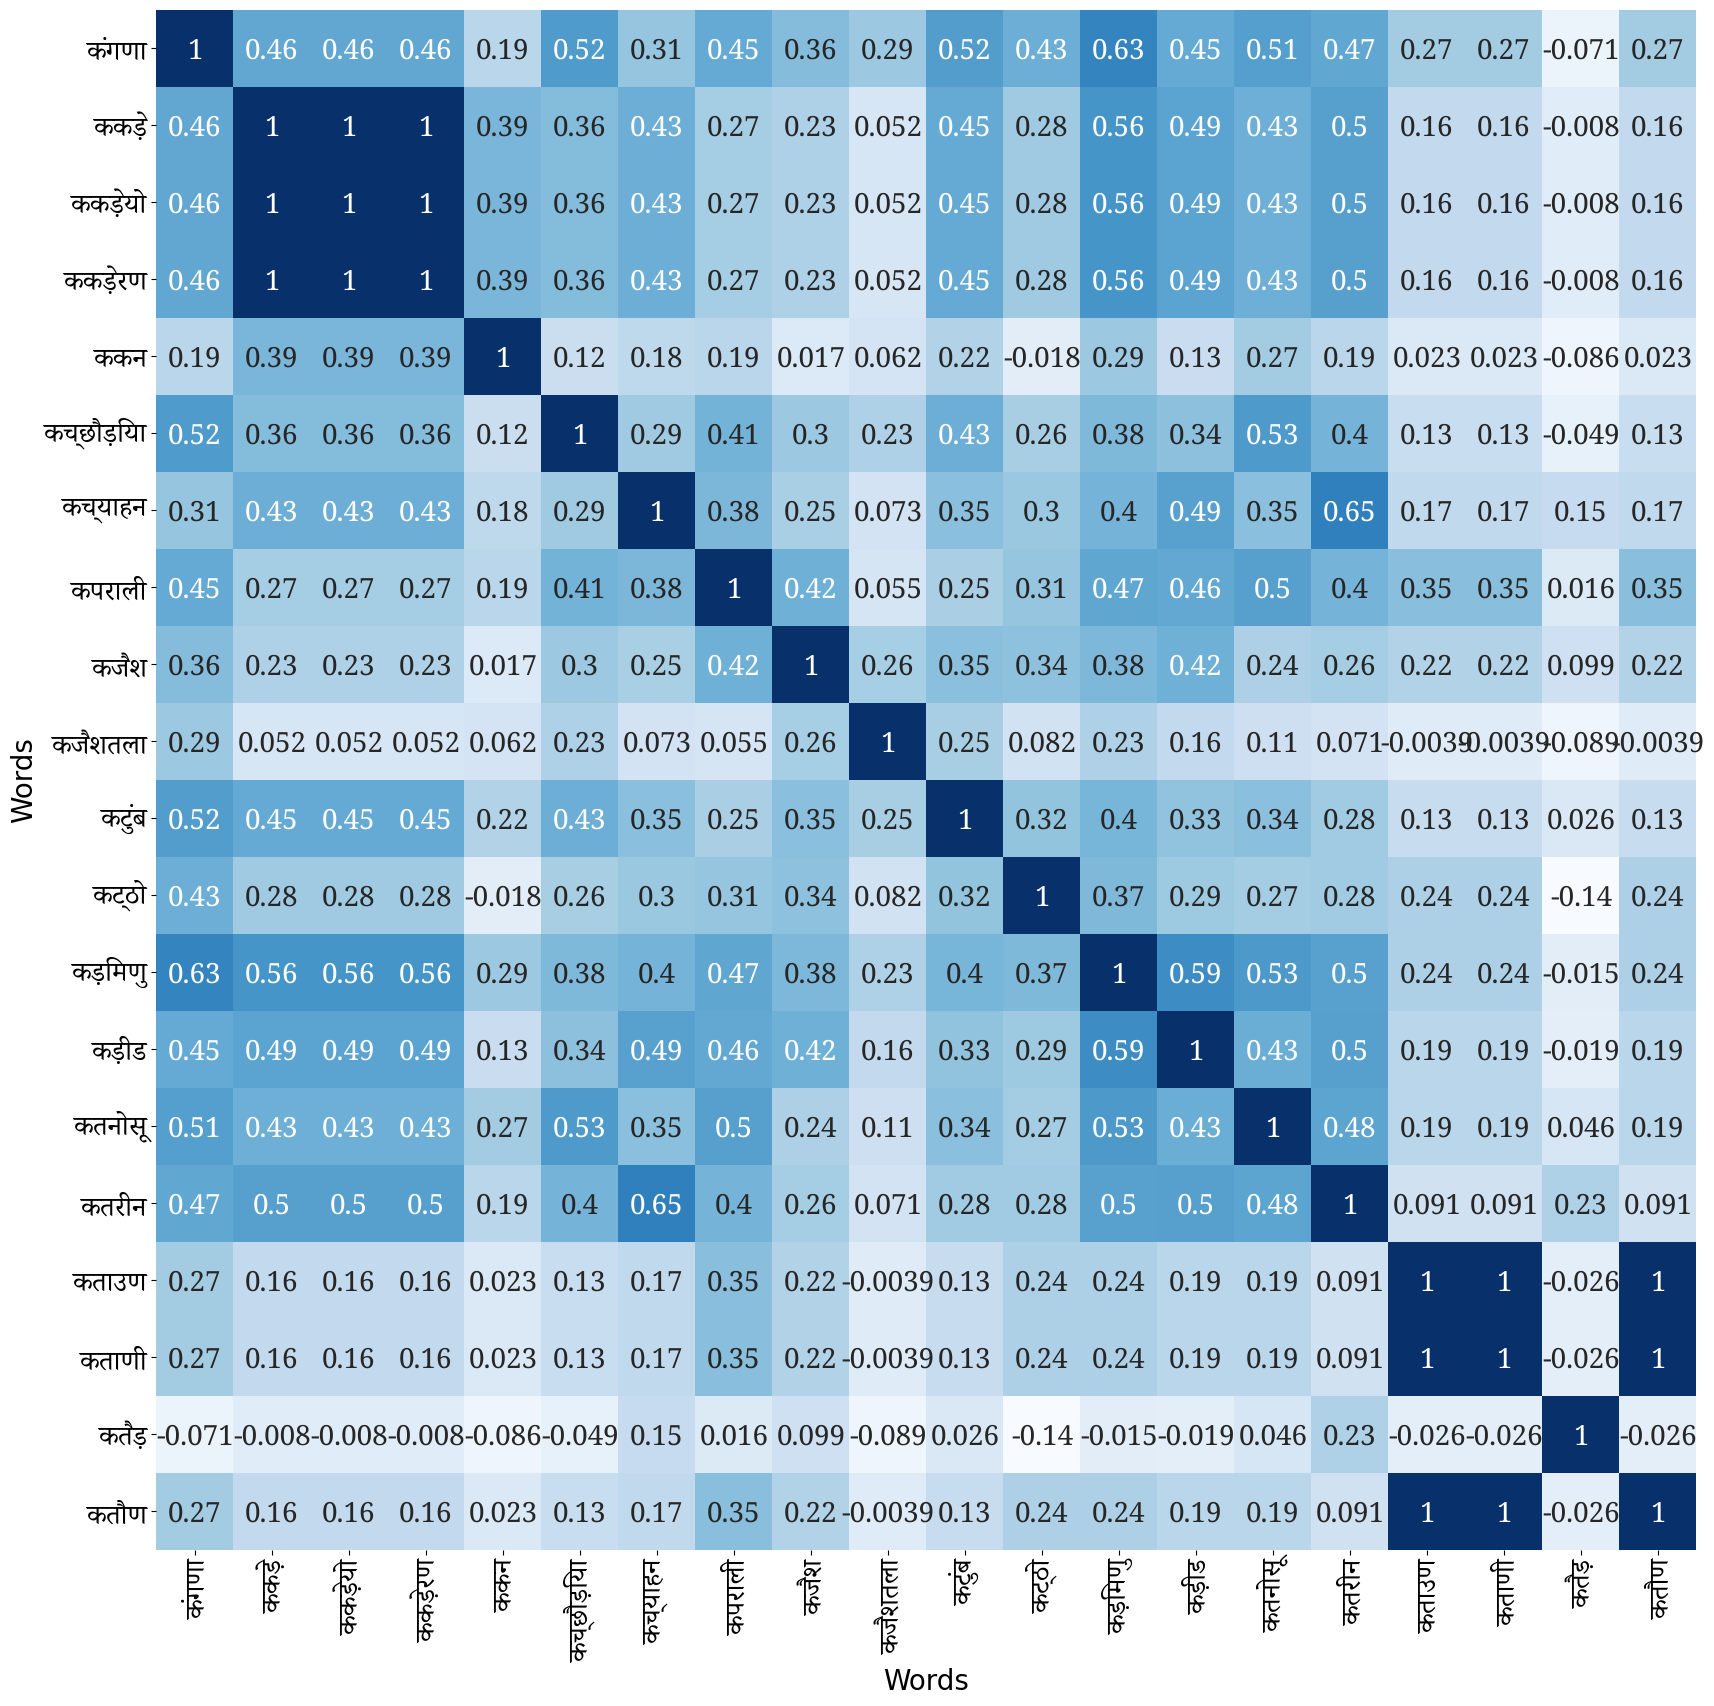

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#a = df["Vectors"][:10].to_numpy()
#b = df["कंऊ":"कंगण"][]#np.array([7., 10., 10., 17., 20., 0., 50.])

distances = df.loc[:19,"कंगणा":"कतौण"].to_numpy() #pairwise_distances(X=a.reshape(-1, 1), Y=b.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20, 20))
#data = flights.pivot(index="Word", columns=df.loc[:10,"कंऊ":"कंगर"].columns.values, values=df.loc[:10,"कंऊ":"कंगर"].columns.values)
s = sns.heatmap(distances, square=True, annot=True, cbar=False, cmap='Blues', ax=ax)
s.set_yticklabels(df.loc[:,"कंगणा":"कतौण"].columns.values)
s.set_xticklabels(df.loc[:19,"कंगणा":"कतौण"].columns.values)
hfont = {'fontname':'Helvetica'}
plt.xlabel('Words', **hfont)
plt.ylabel('Words', **hfont)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
plt.close()